In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from External.ICT.calculate_ICT import calculate_ICT
from External.clustering import centers
from External.generation import create_graph
from External.plotting import plot_points, plot_graph, no_intersections

plt.style.use('standard.mplstyle')

In [5]:
# Hyperparameters
mode = "K_Nearest"
metric = "euclidean"
dataset = "non_convex"
ICT_algorithm = "cluster_all"

# image loading
n = number_of_nodes = 1000
Random = False
image_name = "image"

# for the filename
parameters = "2-0_5-1000"

In [6]:
def load_image(filename):
    a=plt.imread(filename+'.png')
    rgb_weights = [0.2989, 0.5870, 0.1140]
    
    grayscale_image = np.dot(a[...,:3], rgb_weights)>0
    
    return grayscale_image
    
    
def sample_points_from_image(n,img,Random=True):
    if not Random:
        random.seed(42)
    non_zero = np.where(img!=0)
    # non_zero=np.vstack((non_zero[0],non_zero[1])).T
    
    
    idx = random.sample(range(len(non_zero[0])),n)
    
    x_coord = non_zero[0][idx]
    y_coord = non_zero[1][idx]
    return x_coord,y_coord

In [7]:
# Compute the position array
img = load_image(image_name)
position = np.array(sample_points_from_image(n,img,Random)).T
position = StandardScaler().fit_transform(position)

# Compute knearest graph
cluster_centers = centers(position)
G, _ = create_graph(number_of_nodes, mode, position=position, beta=2, delta=0.5)
G.indexEdges()

ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1)
ICT.indexEdges()

Final k: 11


create edgeId array:   0%|          | 0/6370 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/6370 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/999 [00:00<?, ?it/s]

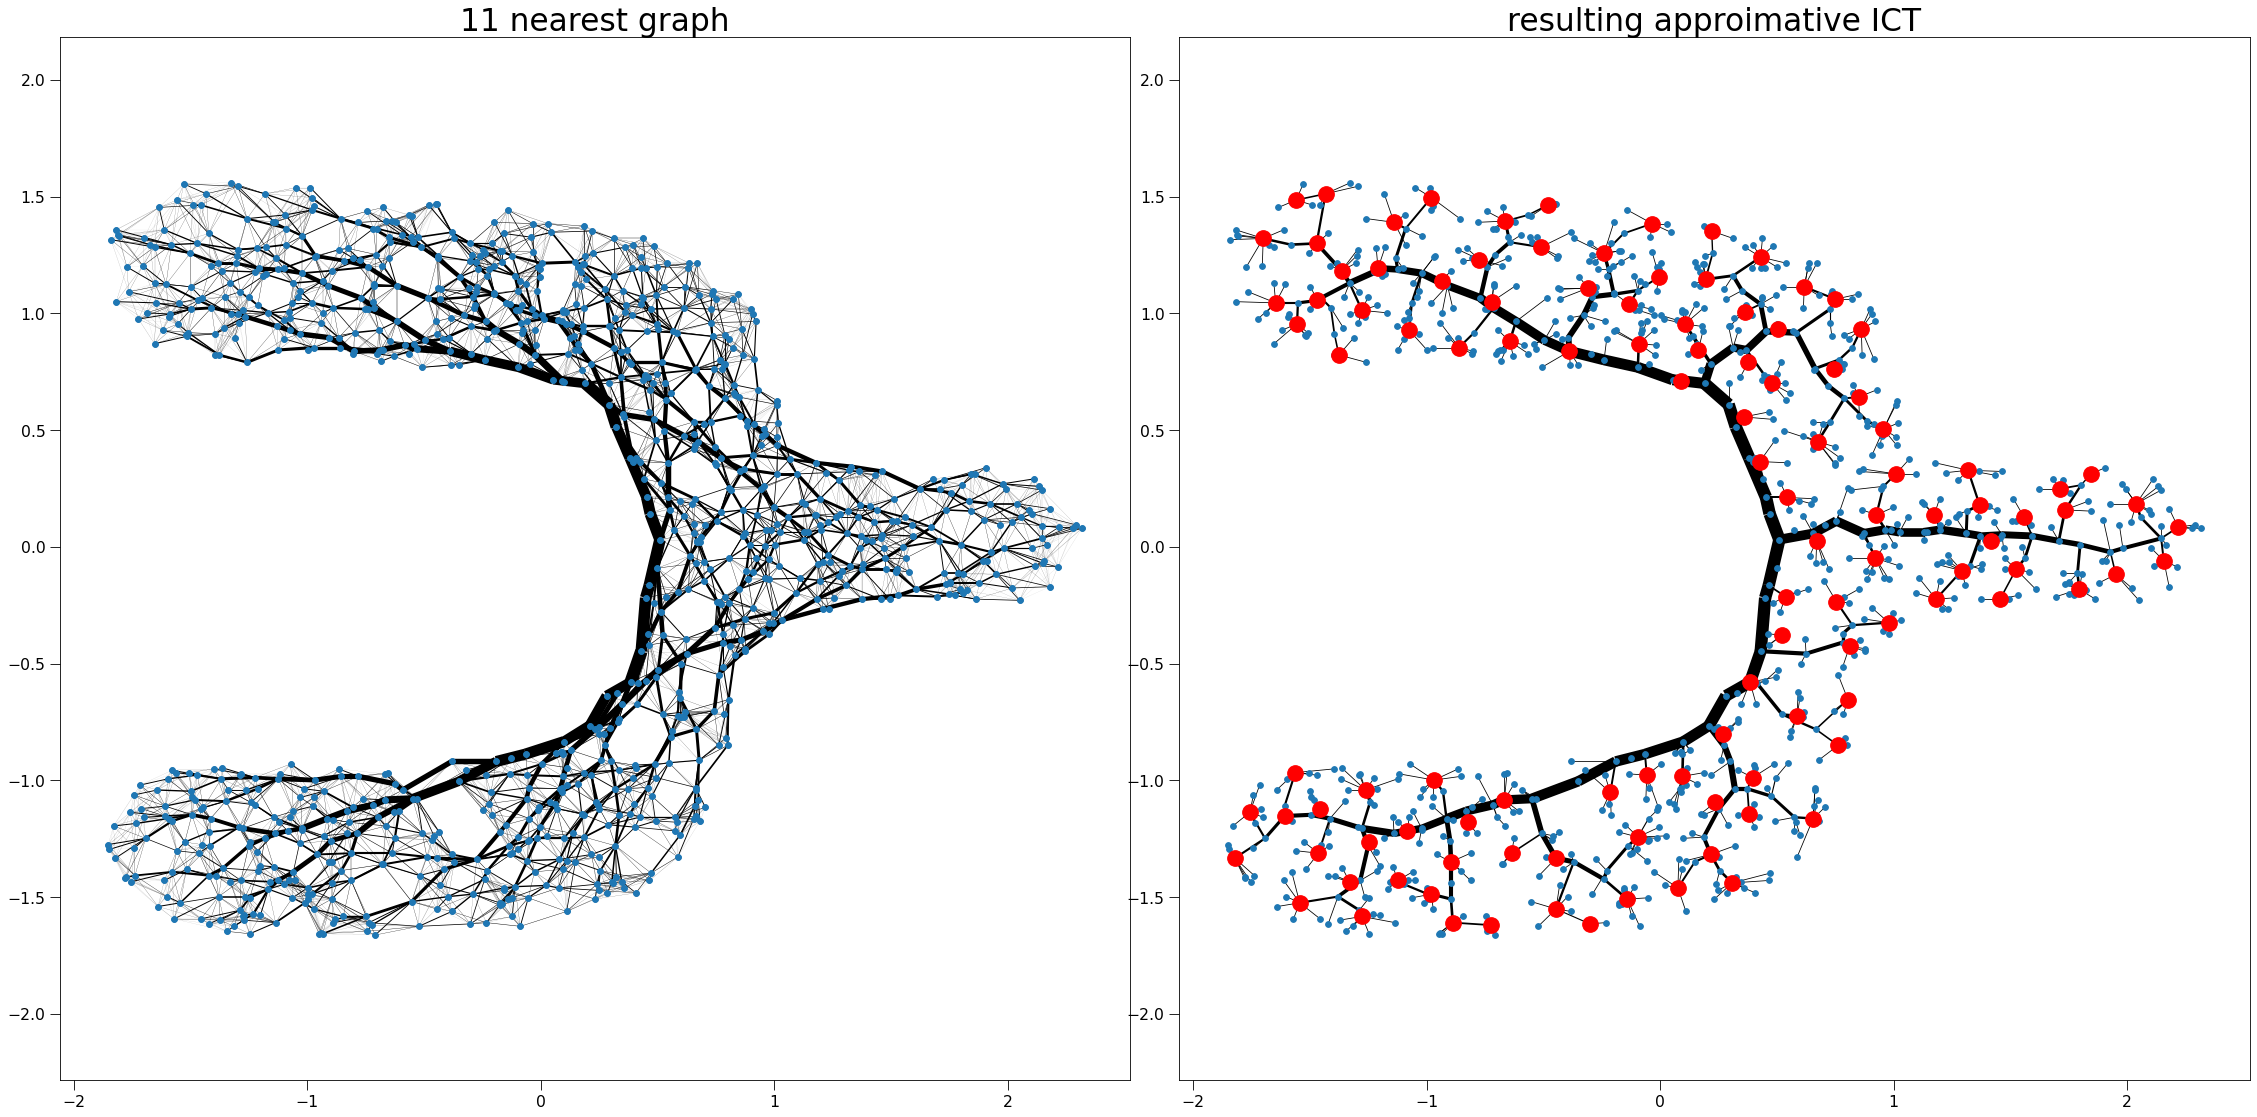

In [10]:
# Plot the prepared data
fig, axs = plt.subplots(1, 2, figsize=(30,15))
plot_points(position, "11 nearest graph", axs[0], node_size=10)
plot_graph(G, position, "11 nearest graph", axs[0], node_size=30)
plot_graph(ICT, position, "resulting approimative ICT", axs[1], cluster_centers, node_size=30)

axs[0].get_legend().remove()


plt.tight_layout()
plt.savefig("./Output/ICT_touches_boundary.png")

plt.show()